#Task : Make a Diabetes Prediction with ML

Importing essential libraries for data exploration and visulization

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Impoting neccessary ML and Preprocessing Tools

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the dataset

In [24]:
df = pd.read_csv('/content/diabetes.csv')

In [25]:
print(df.head())
print(df.info())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Check for invalid zero entries in the columns-Glucose,BloodPressure, SkinThickness, Insulin and BMI, Since these features can't be zero

In [26]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
print("Zero count in important columns: ")
for col in zero_features:
  print(f"{col}: {(df[col] == 0).sum()}")

Zero count in important columns: 
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


Replace zeroes with NaN so we can impute them later

In [27]:
df[zero_features] = df[zero_features].replace(0,np.nan)

Fill NaNs with median(since median is robust to the outliers)

In [28]:
df.fillna(df.median(), inplace = True)

Data Visualization -> Countplot of target variable

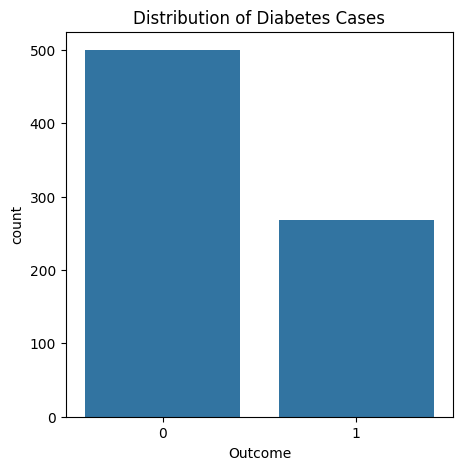

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Outcome')
plt.title("Distribution of Diabetes Cases")
plt.show()

Distribution of features

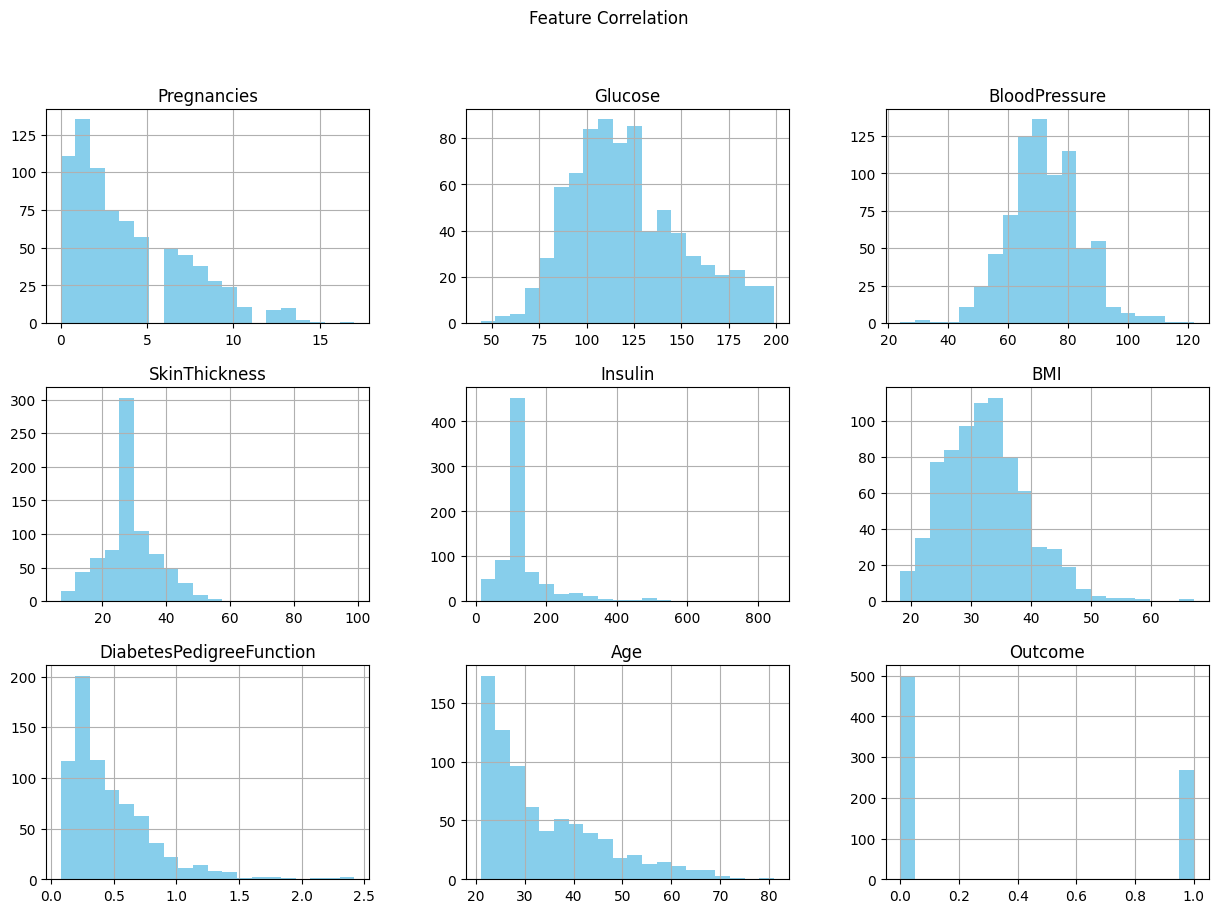

In [30]:
df.hist(bins = 20, figsize =(15,10), color = "skyblue")
plt.suptitle("Feature Correlation")
plt.show()


Boxplots for feature comparison with target

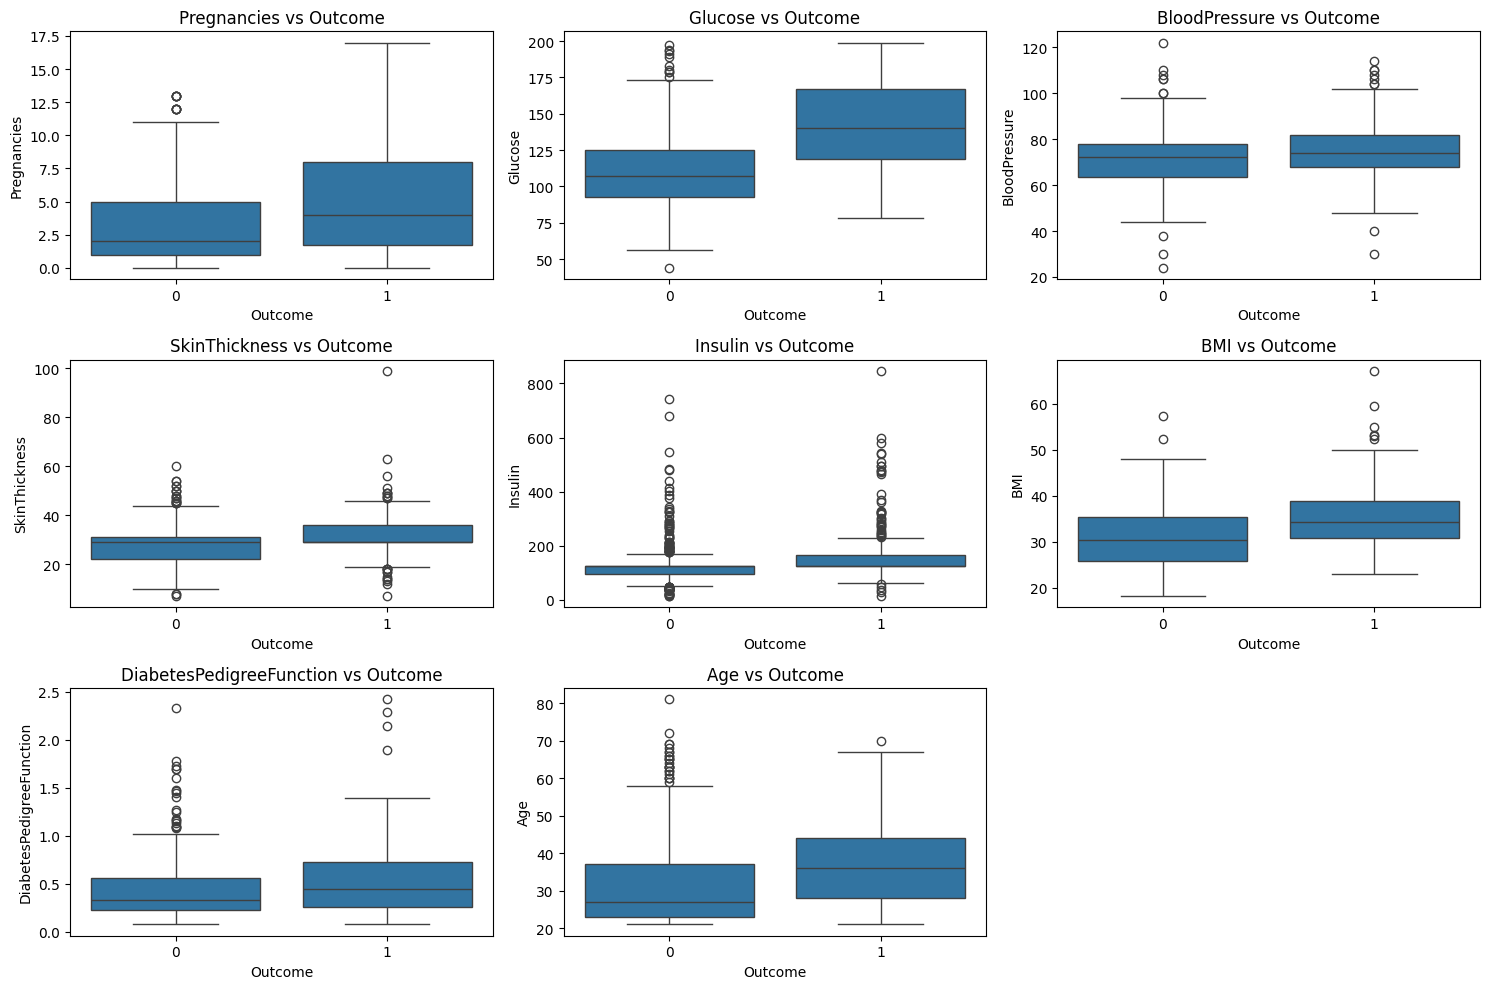

In [31]:
plt.figure(figsize=(15, 10))
for idx, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()


#Data Processing

In [32]:
X = df.drop("Outcome",axis = 1)
y = df["Outcome"]

Feature scaling for fair weightage and faster convergence

In [33]:
scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting into train and test datasets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Model Training

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#Model Evaluation


In [38]:
y_pred = model.predict(X_test)

In [39]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.7532467532467533


In [40]:
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



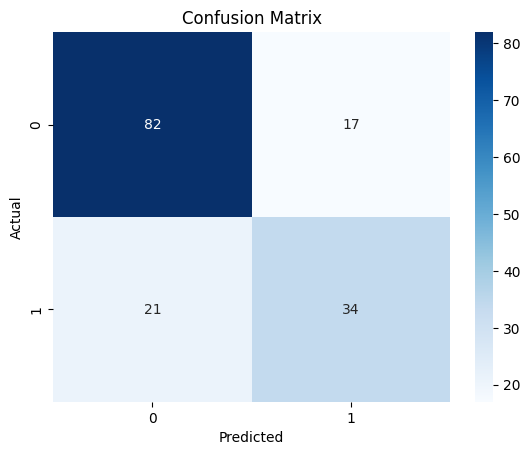

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Hyper-Tuning the model

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],                  # Regularization strength
    'solver': ['liblinear', 'saga'],          # Optimization algorithms
    'penalty': ['l1', 'l2']                   # Type of regularization
}

In [44]:
model2 = LogisticRegression(max_iter = 1000)

In [46]:
grid = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')

In [47]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [48]:
print("Best Parameters: ",grid.best_params_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [50]:
best_model = grid.best_estimator_
y_pred2 = best_model.predict(X_test)

In [51]:
print("\nClssification Report:\n",classification_report(y_test,y_pred2))


Clssification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



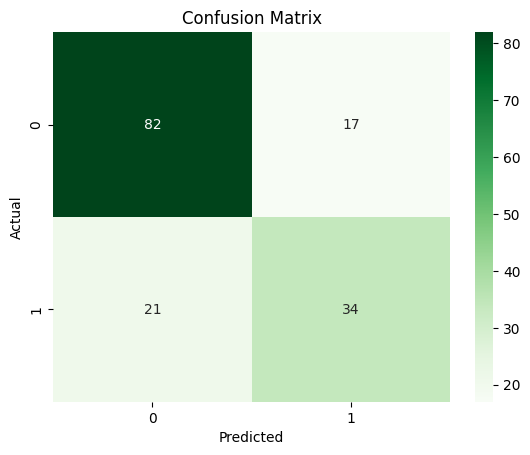

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()